In [19]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, complete
from sklearn.cluster import KMeans
import scipy
import numpy as np
import pandas as pd

In [20]:
print(f'versi matplotlib {matplotlib.__version__}', # 3.5.1
f'versi scipy {scipy.__version__}', # 1.8.0
f'versi numpy {np.__version__}', # 1.22.2
f'versi pd {pd.__version__}', # 1.4.1
sep='\n')

versi matplotlib 3.6.0
versi scipy 1.9.2
versi numpy 1.23.3
versi pd 1.5.0


In [21]:
df = pd.read_csv("Posttest5.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jobEnc,maritalEnc,educationEnc,defaultEnc,housingEnc,loanEnc,contactEnc,monthEnc,poutcomeEnc,depositEnc
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,...,0.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0
1,56,admin.,married,secondary,NaN,45.0,no,no,unknown,5.0,...,0.0,1.0,1.0,NaN,0.0,0.0,2.0,8.0,3.0,0.0
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,...,9.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,...,7.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,...,0.0,1.0,2.0,0.0,0.0,0.0,2.0,8.0,3.0,1.0


In [22]:
points = df.iloc[:,[0,1]].values
points

array([[59, 'admin.'],
       [56, 'admin.'],
       [41, 'technician'],
       ...,
       [32, 'technician'],
       [43, 'technician'],
       [34, 'technician']], dtype=object)

In [23]:
model = KMeans(n_clusters=3)

In [24]:
points = df[["duration","age"]]
model.fit(points)
labels = model.labels_
print(labels)

[1 1 1 ... 0 0 2]


In [25]:
dfKmeans = pd.DataFrame({'labels': labels, 'duration': df.duration})

In [26]:
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["duration"])

In [27]:
print(ct)

duration  2     3     4     5     6     7     8     9     10    11    ...  \
labels                                                                ...   
0            1     1     2     4     6    16    16    10    16    11  ...   
1            0     0     0     0     0     0     0     0     0     0  ...   
2            0     0     0     0     0     0     0     0     0     0  ...   

duration  2769  2770  2775  3076  3094  3102  3183  3253  3284  3881  
labels                                                                
0            0     0     0     0     0     0     0     0     0     0  
1            1     1     1     1     1     1     1     1     1     1  
2            0     0     0     0     0     0     0     0     0     0  

[3 rows x 1427 columns]


In [28]:
xs = points.iloc[:,0]
ys = points.iloc[:,1]

In [29]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

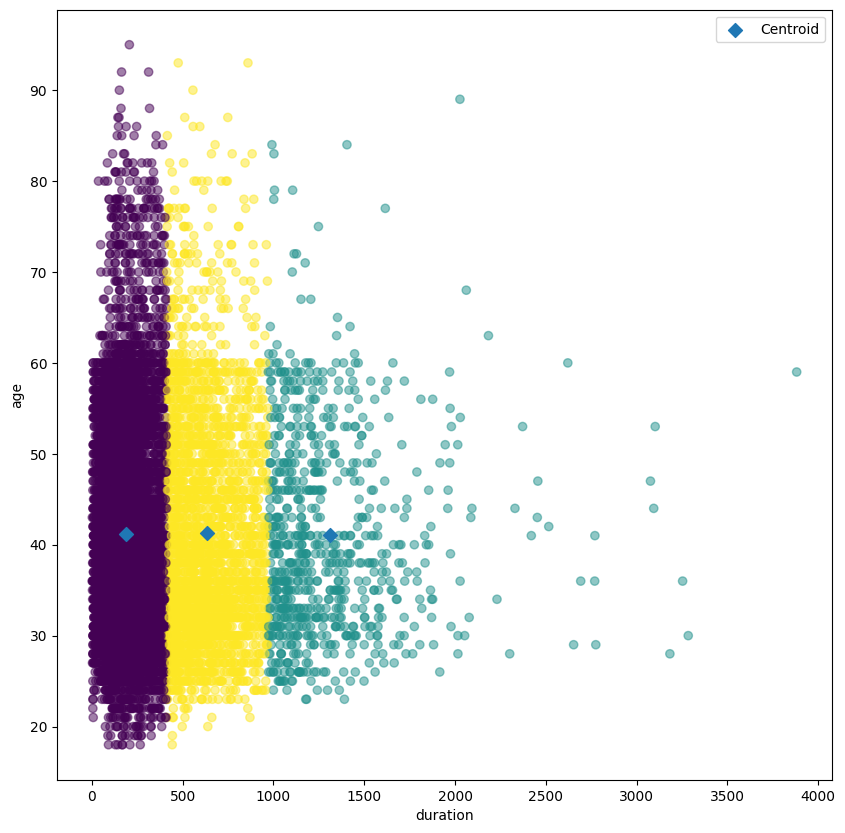

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("duration")
plt.ylabel("age")
plt.legend()
plt.show()

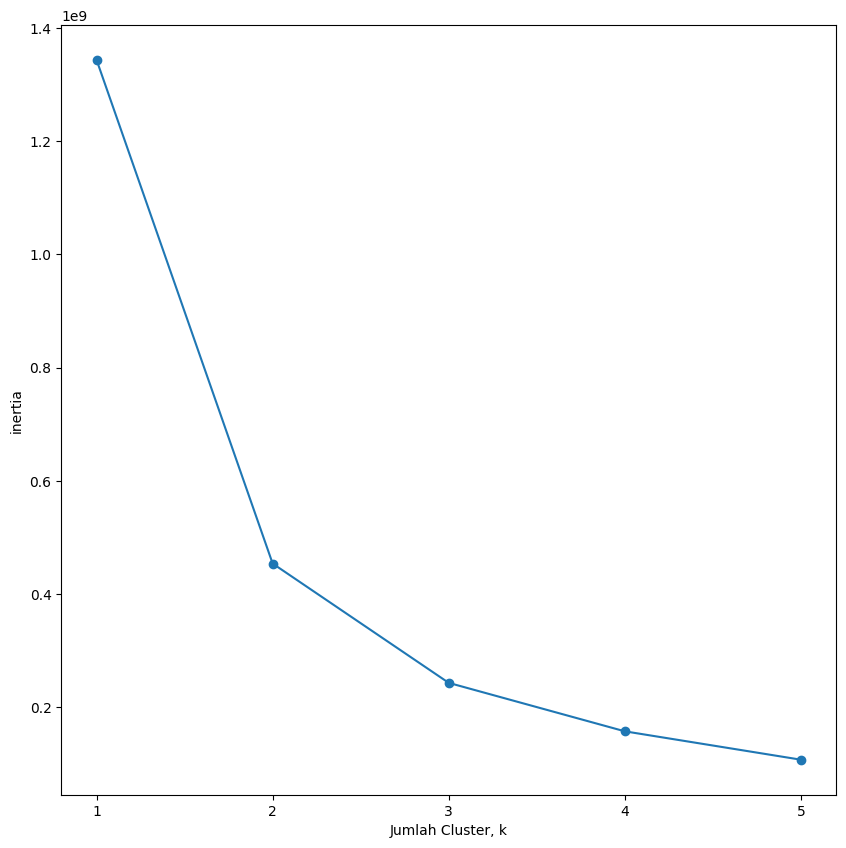

In [33]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()